In [44]:
import numpy as np
import pandas as pd
from linear_regression import LinearRegression, gradient
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


In [13]:
def preprocess_data(df):
    df['area_rooms'] = np.sqrt(df.area * df.rooms)
    df['log_price'] = np.log(df['price'])
    df['root_rooms'] = (df.area ** 1.0 /(df.rooms))

In [14]:
df = pd.read_csv('prices.txt', dtype=np.float64)
df = df.sample(frac=1).reset_index(drop=True)
prices = df['price']
preprocess_data(df)
df.head()

,area,rooms,price,area_rooms,log_price,root_rooms
0,1664.0,2.0,368500.0,57.688820,12.817196,832.000000
1,1962.0,4.0,259900.0,88.588938,12.468052,490.500000
2,1839.0,2.0,349900.0,60.646517,12.765403,919.500000
3,3890.0,3.0,573900.0,108.027774,13.260210,1296.666667
4,1985.0,4.0,299900.0,89.106678,12.611204,496.250000


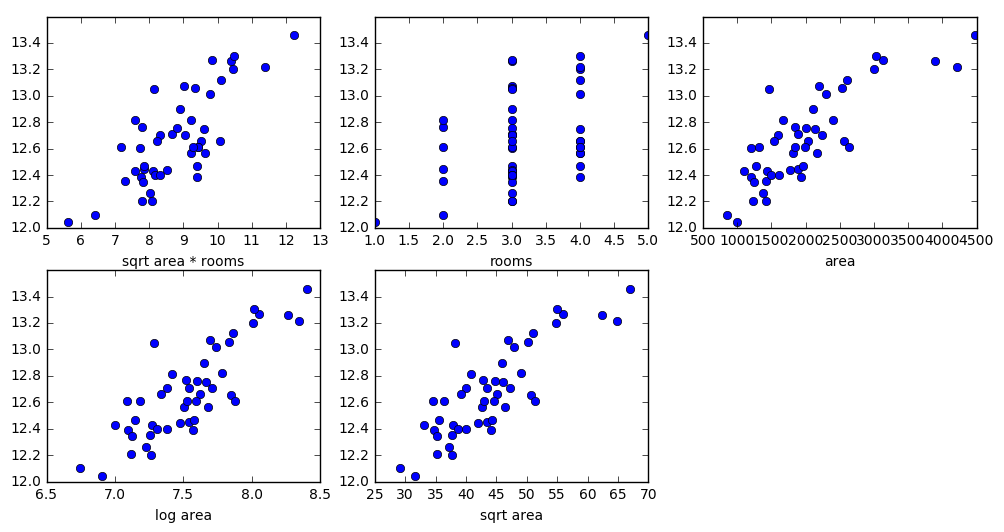

In [4]:
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2, 3, 1)
plt.xlabel('sqrt area * rooms')
plt.plot(list(np.sqrt(df.area_rooms)), list(df.log_price), 'bo')
plt.subplot(2, 3, 2)
plt.xlabel('rooms')
plt.plot(list(df.rooms), list(df.log_price), 'bo')
plt.subplot(2, 3, 3)
plt.xlabel('area')
plt.plot(list(df.area), list(df.log_price), 'bo')
plt.subplot(2, 3, 4)
plt.xlabel('log area')
plt.plot(list(np.log(df.area)), list(df.log_price), 'bo')
plt.subplot(2, 3, 5)
plt.xlabel('sqrt area')
plt.plot(list(np.sqrt(df.area)), list(df.log_price), 'bo')
plt.show()

In [6]:
def score(y_pred, y_true):
    q = 0
    for (x, y) in zip(y_pred, y_true):
        q += (x - y) ** 2
    return (q / len(y_pred)) ** 0.5

In [7]:
train_to = 42
X, y = df.loc[:train_to, ['rooms', 'area']].as_matrix(), df.loc[:train_to, ['price']].as_matrix()
Xt, yt = df.loc[train_to:, ['rooms', 'area']].as_matrix(), df.loc[train_to:, ['price']].as_matrix()

[[ -3.22597412e+148  -3.22597412e+148  -4.26586382e+147  -3.92998462e+144]]
Test score:  [  8.01083208e+148]


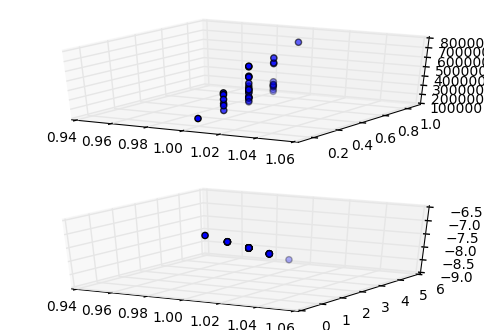

In [46]:
reg = LinearRegression(False, 0)

maxRooms = float(max(X[:,0]))
maxArea = float(max(X[:, 1]))
maxPrice = max(y)
X[:, 0] = X[:, 0] / maxRooms
X[:, 1] = X[:, 1] / maxArea
y = y / maxPrice
reg.fit(X, y)
reg.weights[0][0] *= maxPrice
reg.weights[0][1] *= maxPrice/maxRooms
reg.weights[0][2] *= maxPrice/maxArea
y = y * maxPrice
print(reg.weights)
Xt = np.c_[np.ones((Xt.shape[0], 1)), Xt]
print('Test score: ', score(np.dot(Xt, reg.weights.T), yt))
fig = plt.figure()
ax = fig.add_subplot(211, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y)
X[:, 0] = X[:, 0] * maxRooms
X[:, 1] = X[:, 1] * maxArea
X = np.c_[np.ones((X.shape[0], 1)), X]
ax2 = fig.add_subplot(212, projection='3d')
ax2.scatter(X[:, 1], X[:, 2], np.dot(X, reg.weights.T))
plt.show()

In [57]:
reg2 = LinearRegression(False, 0, 'exact')
train_to = 46
X, y = df.loc[:train_to, ['rooms', 'area']].as_matrix(), df.loc[:train_to, ['price']].as_matrix()
Xt, yt = df.loc[train_to:, ['rooms', 'area']].as_matrix(), df.loc[train_to:, ['price']].as_matrix()
reg2.fit(X, y)
X = np.c_[np.ones((X.shape[0], 1)), X]
Xt = np.c_[np.ones((Xt.shape[0], 1)), Xt]
print(reg2.weights)
print('Train score', score(np.dot(X, reg2.weights.T), y))
print('Test score', score(np.dot(Xt, reg2.weights.T), yt))

[[ 89597.9095428   -8738.01911233    139.21067402]]
Train score [ 63926.20824987]
Test score [ 5965.87731365]


[ 89597.90899583  -8738.01935265    139.21067431]
Test score [ 63926.20824987]
Train score [ 5965.87640985]


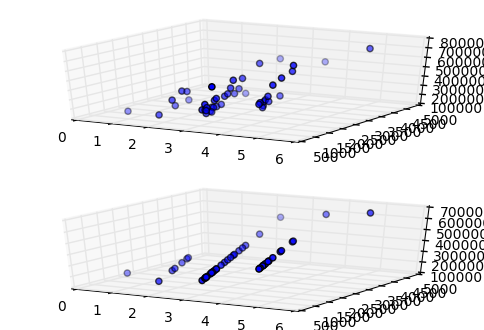

In [55]:
regEvo = LinearRegression(False, 0, 'evolution')
train_to = 46
X, y = df.loc[:train_to, ['rooms', 'area']].as_matrix(), df.loc[:train_to, ['price']].as_matrix()
Xt, yt = df.loc[train_to:, ['rooms', 'area']].as_matrix(), df.loc[train_to:, ['price']].as_matrix()
regEvo.fit(X, y)
X = np.c_[np.ones((X.shape[0], 1)), X]
Xt = np.c_[np.ones((Xt.shape[0], 1)), Xt]
print(regEvo.weights)
print('Train score', score(np.dot(X, regEvo.weights.T), y))
print('Test score', score(np.dot(Xt, regEvo.weights.T), yt))
fig = plt.figure()
ax = fig.add_subplot(211, projection='3d')
ax.scatter(X[:, 1], X[:, 2], y)
ax2 = fig.add_subplot(212, projection='3d')
ax2.scatter(X[:, 1], X[:, 2], np.dot(X, weights))
plt.show()

[ 89597.9095428   -8738.01911233    139.21067402]
Train score:  [ 63926.20824987]
Test score:  [ 5965.87731365]


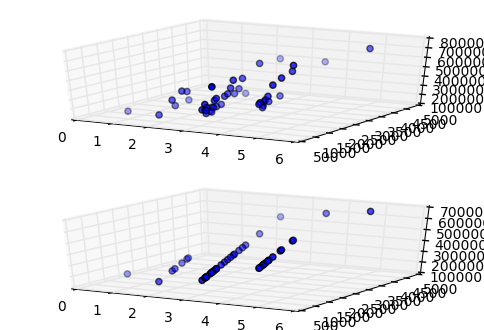

In [56]:
reg = LinearRegression(False, 0, 'conj')
train_to = 46
X, y = df.loc[:train_to, ['rooms', 'area']].as_matrix(), df.loc[:train_to, ['price']].as_matrix()
Xt, yt = df.loc[train_to:, ['rooms', 'area']].as_matrix(), df.loc[train_to:, ['price']].as_matrix()
#X = np.c_[np.ones((X.shape[0], 1)), X]
weights = reg.fit(X, y).T
print(reg.weights)

X = np.c_[np.ones((X.shape[0], 1)), X]
Xt = np.c_[np.ones((Xt.shape[0], 1)), Xt]
print('Train score: ', score(np.dot(X, weights), y))
print('Test score: ', score(np.dot(Xt, weights), yt))
fig = plt.figure()
ax = fig.add_subplot(211, projection='3d')
ax.scatter(X[:, 1], X[:, 2], y)
ax2 = fig.add_subplot(212, projection='3d')
ax2.scatter(X[:, 1], X[:, 2], np.dot(X, weights))
plt.show()

[ 104674.77865401 -110207.63290331    7391.60634228]
Train score:  [ 65405.92847835]
Test score:  [ 64120.43707707]


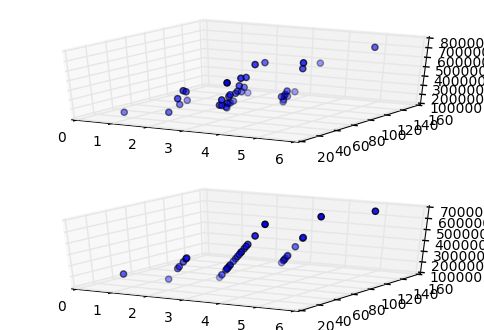

In [38]:
reg = LinearRegression(False, 0, 'conj')
train_to = 40
X, y = df.loc[:train_to, ['rooms','area_rooms']].as_matrix(), df.loc[:train_to, ['price']].as_matrix()
Xt, yt = df.loc[train_to:, ['rooms', 'area_rooms']].as_matrix(), df.loc[train_to:, ['price']].as_matrix()
#X = np.c_[np.ones((X.shape[0], 1)), X]
weights = reg.fit(X, y).T
print(reg.weights)

X = np.c_[np.ones((X.shape[0], 1)), X]
Xt = np.c_[np.ones((Xt.shape[0], 1)), Xt]
print('Train score: ', score(np.dot(X, weights), y))
print('Test score: ', score(np.dot(Xt, weights), yt))
fig = plt.figure()
ax = fig.add_subplot(211, projection='3d')
ax.scatter(X[:, 1], X[:, 2], y)
ax2 = fig.add_subplot(212, projection='3d')
ax2.scatter(X[:, 1], X[:, 2], np.dot(X, weights))
plt.show()

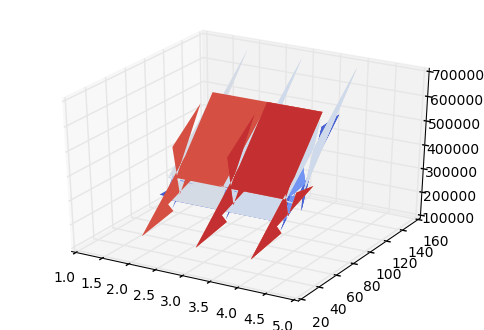

In [45]:
Y_pr = np.dot(X, weights)
Xm, Ym = np.meshgrid(X[:,1], X[:, 2])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Xm, Ym, y, cmap = cm.coolwarm, linewidth=0, antialiased=True)
plt.show()

In [25]:
Ym

array([[  57.68882041,   57.68882041,   57.68882041, ...,   57.68882041,
          57.68882041,   57.68882041],
       [  88.58893836,   88.58893836,   88.58893836, ...,   88.58893836,
          88.58893836,   88.58893836],
       [  60.6465168 ,   60.6465168 ,   60.6465168 , ...,   60.6465168 ,
          60.6465168 ,   60.6465168 ],
       ..., 
       [  31.6227766 ,   31.6227766 ,   31.6227766 , ...,   31.6227766 ,
          31.6227766 ,   31.6227766 ],
       [  79.44809626,   79.44809626,   79.44809626, ...,   79.44809626,
          79.44809626,   79.44809626],
       [ 110.10903687,  110.10903687,  110.10903687, ...,  110.10903687,
         110.10903687,  110.10903687]])